In [1]:
from imutils.video import VideoStream
from imutils.video import FPS
import numpy as np
import imutils
import time
import cv2
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import easyocr

In [2]:
reader = easyocr.Reader(['en'])

In [5]:
train = pd.read_csv('train/train.csv')
train

,id,date,employee,action
0,1256,2022-05-24 08:08:36,2,15.0
1,1257,2022-05-24 08:08:37,2,4.0
2,1258,2022-05-24 08:12:13,3,15.0
3,1259,2022-05-24 08:12:25,3,2.0
4,1260,2022-05-24 08:12:42,3,12.0
...,...,...,...,...
3514,4770,2022-05-28 07:42:51,0,4.0
3515,4771,2022-05-28 07:44:27,0,14.0
3516,4772,2022-05-28 07:44:36,0,3.0
3517,4773,2022-05-28 07:46:21,0,13.0


In [5]:
sorted(train.employee.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11]

In [6]:
sorted(train.action.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 18.0,
 19.0]

In [248]:
vs = cv2.VideoCapture("train/train2.avi")

<ipython-input-249-403c74007527>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


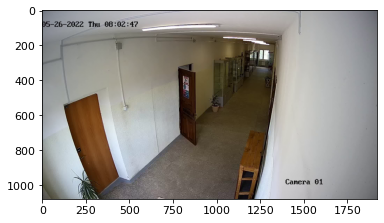

In [249]:
ret, frame = vs.read()

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

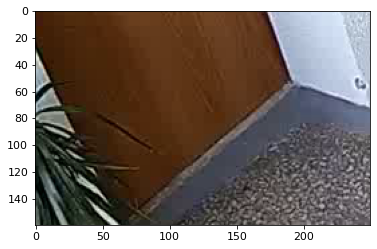

In [259]:
img = frame[900:1060,250:500,:]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [ ]:
img = frame[900:1060,250:500,:]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [ ]:
1.2 1.02

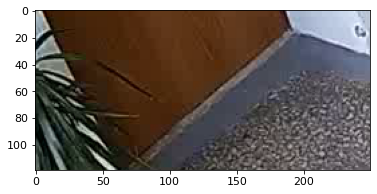

In [264]:
img = frame[int(h/1.15):int(h/1.02),250:500,:]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [250]:
fps = vs.get(cv2.CAP_PROP_FPS)
fps

60.0

In [251]:
h, w, c = frame.shape

In [252]:
h, w, c

(1080, 1920, 3)

In [238]:
img = frame[h//20:h//9,:w//3,:]

<ipython-input-239-afa3ecd0aedd>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


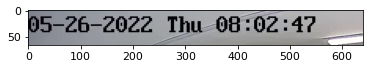

In [239]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [101]:
result = reader.readtext(img, detail=0)
result

['05-24-Z022', 'Tue 08:08 :37']

In [142]:
clean_date(result)

'2022-24-05 08:08:37'

In [76]:
result[0][1]

'05-24-Z022'

In [54]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5l6')  # or yolov5n - yolov5x6, custom

Using cache found in /home/andrey/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-31 Python-3.9.2 torch-1.11.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4040MiB)



  0%|          | 0.00/147M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5l6 summary: 476 layers, 76726332 parameters, 0 gradients
Adding AutoShape... 


In [93]:
image = frame.copy()

In [94]:
# Images
# img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(frame)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 1920x2560 1 person, 1 chair, 2 potted plants
Speed: 9.9ms pre-process, 77.1ms inference, 3.1ms NMS per image at shape (1, 3, 512, 640)


In [95]:
results.show()

In [96]:
df = results.pandas().xyxy

In [97]:
df = df[0]

In [160]:
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,1181.596069,684.781006,1316.795532,1211.582275,0.832024,0,person
1,1291.521973,644.816406,1413.466797,1172.419922,0.796255,0,person
2,219.634323,1593.199951,447.998657,1917.208008,0.551723,58,potted plant


In [168]:
df[df['name'] == 'person']

,xmin,ymin,xmax,ymax,confidence,class,name
0,1181.596069,684.781006,1316.795532,1211.582275,0.832024,0,person
1,1291.521973,644.816406,1413.466797,1172.419922,0.796255,0,person


In [171]:
for item in df[df['name'] == 'person'].values:
    print(item)

[1181.5960693359375 684.781005859375 1316.7955322265625 1211.582275390625 0.8320244550704956 0 'person']
[1291.52197265625 644.81640625 1413.466796875 1172.419921875 0.7962549328804016 0 'person']


In [111]:
int(1652.5836181640625)

1652

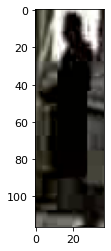

In [116]:
plt.imshow(cv2.cvtColor(image[468:585,1652:1689,:], cv2.COLOR_BGR2RGB));
#plt.show()

In [118]:
cv2.imwrite('images/sample.png', image[468:585,1652:1689,:])

True

In [232]:
def clean_date(d):
    dig = '0123456789-:'; nd = '';
    date = ' '.join(d).replace('Z', '2').replace('z', '2')
    # print(date)
    if date.find('-202 ') >= 0: date=date.replace('202','2022');
    # print(date.find('-202 '))
    # print(nd)
    for it in date:
        if it in dig: nd += it;
    # print(nd)
    nd = '2022 '.join(nd.split('2022'))
    if len(nd) < 18: return '0';
    # print(nd)
    ddd = nd.split(' ')[0].split('-')
    if len(ddd) != 3: return '0';
    res = ddd[2]+'-'+ddd[0]+'-'+ddd[1]+' '+nd.split(' ')[1]
    return res

In [182]:
train = pd.read_csv('train/train.csv')
# train

In [128]:
tst = '2022-05-24 08:12:42'
dl = train[train.date == tst]
dl.id.item()

1260

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5l6')

In [241]:
video = cv2.VideoCapture("train/train2.avi")
fps = video.get(cv2.CAP_PROP_FPS)
fr = 0
old_date = ''; imcount = 0;
many = []
while True:
    ret, frame = video.read()
    if not ret:
        print("end of file")
        break
    fr += 1
    if fr % 5 != 0: continue;
        
    h, w, c = frame.shape
    date_img = frame[h//20:h//9,:w//3,:]
    date = reader.readtext(date_img, detail=0)
    # print(date)
    date = clean_date(date)
    if date == '0': continue;
    if old_date != date:
        old_date = date
        # print('new',date)
    
    df = train[train.date == date]
    if len(df) > 0:
        if len(df) > 1:
            # print('many')
            many.append(df)
            continue;
        idx = df.id.item()
        label = df.employee.item()
    else:
        # print('none')
        continue
#    print(idx)
    image = frame.copy()
    df = model(frame).pandas().xyxy[0]

    if len(df[df['name'] == 'person']) > 0:
        for item in df[df['name'] == 'person'].values:
            xmin = int(item[0])
            xmax = int(item[2])
            ymin = int(item[1])
            ymax = int(item[3])
            cv2.imwrite(f'images/{label}/{idx}.png', image[ymin:ymax,xmin:xmax,:])
        imcount += 1
    if imcount % 10 == 0:
        print(imcount)

0
0
10
20
30
30
40
50
50
50
50
60
70
80
90
100
110
120
130
140
140
140
150
160
160
160
160
160
160
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
330
330
330
330
330
330
330
340
340
340
340
350
360
370
380
390
400
410
420
430
440
450
460
460
460
460
460
460
460
460
470
480
490
500
510
520
530
540
540
540
550
560
570
580
590
600
610
620
630
640
650
660
660
660
660
670
680
690
700
710
720
720
720
720
720
720
720
720
720
720
730
740
750
760
770
770
770
770
770
780
790
790
790
790
790
790
790
790
790
790
790
790
790
790
790
790
800
810
820
830
830
830
830
830
830
830
830
830
840
850
860
860
860
860
860
860
860
860
860
860
860
860
860
870
880
880
890
890
890
890
900
910
920
930
940
950
960
960
960
960
960
960
960
960
970
980
990
1000
1000
1000
1000
1000
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1100
1110
1110
1110
1110
1110
1110
1110
1120
1130
1140
1150
1160
1170
1180
1190
1190
1200
1210
1220
1230
1230
1230
1230
1240
1250
1260
1270
1280
1280
1280
1280
1

In [231]:
# date = '2022-05-24 08:08:36'
date

['05-25-ZOZZ Ied']

In [ ]:
'2022-05-24 08:08:36'

In [173]:
train[train.date == date]

,id,date,employee,action
31,1287,2022-05-24 08:56:20,3,12.0


In [176]:
df

,id,date,employee,action
65,1321,2022-05-24 09:34:59,6,5.0
66,1322,2022-05-24 09:34:59,5,14.0


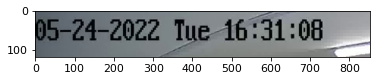

In [180]:
plt.imshow(cv2.cvtColor(date_img, cv2.COLOR_BGR2RGB))

In [181]:
reader.readtext(date_img, detail=0)

['05-24-Z02', 'Tue 16:31:08']

In [189]:
dd = '05-24-Z022 Tue 08:08:34'

In [226]:
clean_date(date)

'2022-05-24 16:31:08'

In [203]:
dig = '0123456789-:'; nd = '';
d = ' '.join(date).replace('Z', '2')

# if date.find('-202 ') >= 0: nd=nd.replace('202','2022')    
# for it in date:
#     if it in dig: nd += it;

# nd = '2022 '.join(nd.split('2022'))
# ddd = nd.split(' ')[0].split('-')
# res = ddd[2]+'-'+ddd[0]+'-'+ddd[1]+' '+nd.split(' ')[1]

In [204]:
d

'05-24-202 Tue 16:31:08'

In [205]:
d.find('-202')

5

In [206]:
d=d.replace('202','2022')
d

'05-24-2022 Tue 16:31:08'

In [207]:
nd = ''
for it in d:
    if it in dig: nd += it;

In [208]:
nd

'05-24-202216:31:08'

In [209]:
nd = '2022 '.join(nd.split('2022'))
nd

'05-24-2022 16:31:08'

In [210]:
ddd = nd.split(' ')[0].split('-')
ddd

['05', '24', '2022']